<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Привет! Вторичные комментарии начинаю с V2

Вот как можно увеличить RMSE:

1. Попробуй увеличить lag до 24
2. Для fit можешь объединить тренировочную и валидационную выборки

Удачи!)
</div>

Привет, Глеб! Как дела?) ☺️
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы

И рекомендую писать введение от первого лица множественного числа. Так работа выглядит более самостоятельной)
</div>

## Подготовка

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rc("figure",figsize=(20,10))
import time
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from statsmodels.tsa.stattools import adfuller
from catboost import CatBoostRegressor
import lightgbm as lgb


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Правильное решение — выделять отдельную ячейку в начале проекта под подключение библиотек и настройки. Tак код легче поддерживать 👌 Но также стоит соблюдать рекомендации PEP-8 при написании кода. У импортов есть тоже определенные правила. Это сделано для повышения читабельности и простоты работы с кодом. <br>

https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html
</div>

In [2]:
try:
    data=pd.read_csv( 'C:/Users/elve/Desktop/Обучение/data/taxi.csv', index_col=[0], parse_dates=[0])
except:
    data=pd.read_csv('/datasets/taxi.csv',index_col=[0], parse_dates=[0])

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Признак даты сделали индексом, тем самым преобразовали датафрейм во временной ряд 👍
</div>

In [3]:
data.sort_index(inplace=True)
data = data.resample('1H').sum()
data.columns

Index(['num_orders'], dtype='object')

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>
   
Значения индекса расположены в хронологическом порядке 👍
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ресемплирование выполнено верно 👍 Суммирование проще интерпретируется, чем использование других агрегационных функций
</div>

In [4]:
data['hour'] = data.index.hour
data['day'] = data.index.day
data['dayofweek'] = data.index.dayofweek
data['month'] = data.index.month
data.head(10)

,num_orders,hour,day,dayofweek,month
datetime,,,,,
2018-03-01 00:00:00,124,0,1,3,3
2018-03-01 01:00:00,85,1,1,3,3
2018-03-01 02:00:00,71,2,1,3,3
2018-03-01 03:00:00,66,3,1,3,3
2018-03-01 04:00:00,43,4,1,3,3
2018-03-01 05:00:00,6,5,1,3,3
2018-03-01 06:00:00,12,6,1,3,3
2018-03-01 07:00:00,15,7,1,3,3
2018-03-01 08:00:00,34,8,1,3,3


<b>Выводы:</b>
Получены данные и добавлены календарные признаки. Годовой признак не добавлялся так как датасет лежит в пределах одного года.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Дополнительные признаки успешно добавлены 👍
</div>

## Анализ

В данных можно предположить наличие двух  вложенных  сезонностей:  
* Дневная сезонность с переиодом 24 часа
* Недельная сезонность с периодом 168 часов
    

In [5]:
data_check=data.copy()

In [6]:
data_check['rolling_mean_day'] = data_check['num_orders'].rolling(24).mean()
data_check['rolling_mean_week'] = data_check['num_orders'].rolling(168).mean()

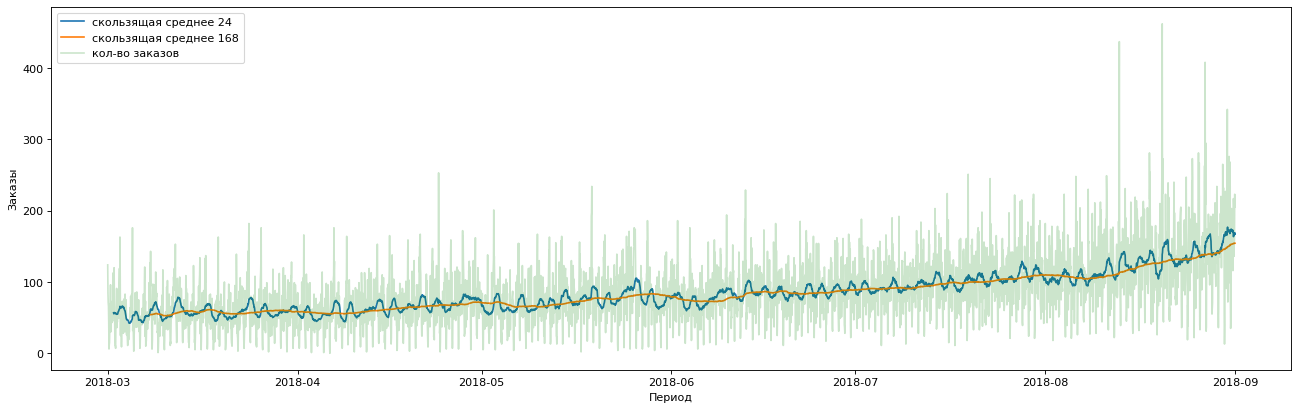

In [7]:

plt.figure(figsize=(20, 6), dpi=80)
plt.plot(data_check['rolling_mean_day'], label='скользящая среднее 24')
plt.plot(data_check['rolling_mean_week'], label='скользящая среднее 168')
plt.plot(data_check['num_orders'], label='кол-во заказов', alpha=0.2, color="green")
plt.legend()
plt.ylabel('Заказы')
plt.xlabel('Период')
plt.show()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Визуализировали исходный и сглаженный временной ряд - отлично!
</div>

In [8]:

for roll in range(1,50):
    data_check['rolling_mean'] = data_check['num_orders'].rolling(roll).mean()
    data_check.dropna(inplace=True)
    RMSE=math.sqrt(mean_squared_error(data_check['num_orders'], data_check['rolling_mean']))
    print(roll)
    print(' RMSE= {:.2f}'.format(RMSE))

    

1
 RMSE= 0.00
2
 RMSE= 19.65
3
 RMSE= 25.72
4
 RMSE= 29.97
5
 RMSE= 32.71
6
 RMSE= 34.38
7
 RMSE= 35.38
8
 RMSE= 35.74
9
 RMSE= 35.89
10
 RMSE= 36.26
11
 RMSE= 36.57
12
 RMSE= 36.60
13
 RMSE= 36.57
14
 RMSE= 36.63
15
 RMSE= 36.83
16
 RMSE= 37.14
17
 RMSE= 37.29
18
 RMSE= 37.47
19
 RMSE= 37.78
20
 RMSE= 38.09
21
 RMSE= 38.29
22
 RMSE= 38.34
23
 RMSE= 38.14
24
 RMSE= 37.57
25
 RMSE= 36.83
26
 RMSE= 36.47
27
 RMSE= 36.44
28
 RMSE= 36.73
29
 RMSE= 37.03
30
 RMSE= 37.30
31
 RMSE= 37.58
32
 RMSE= 37.81
33
 RMSE= 37.98
34
 RMSE= 38.17
35
 RMSE= 38.39
36
 RMSE= 38.50
37
 RMSE= 38.64
38
 RMSE= 38.78
39
 RMSE= 38.92
40
 RMSE= 39.07
41
 RMSE= 39.25
42
 RMSE= 39.40
43
 RMSE= 39.60
44
 RMSE= 39.77
45
 RMSE= 40.03
46
 RMSE= 40.15
47
 RMSE= 40.10
48
 RMSE= 39.87
49
 RMSE= 39.43


In [9]:
data['num_orders'].describe()

count    4416.000000
mean       84.422781
std        45.023853
min         0.000000
25%        54.000000
50%        78.000000
75%       107.000000
max       462.000000
Name: num_orders, dtype: float64

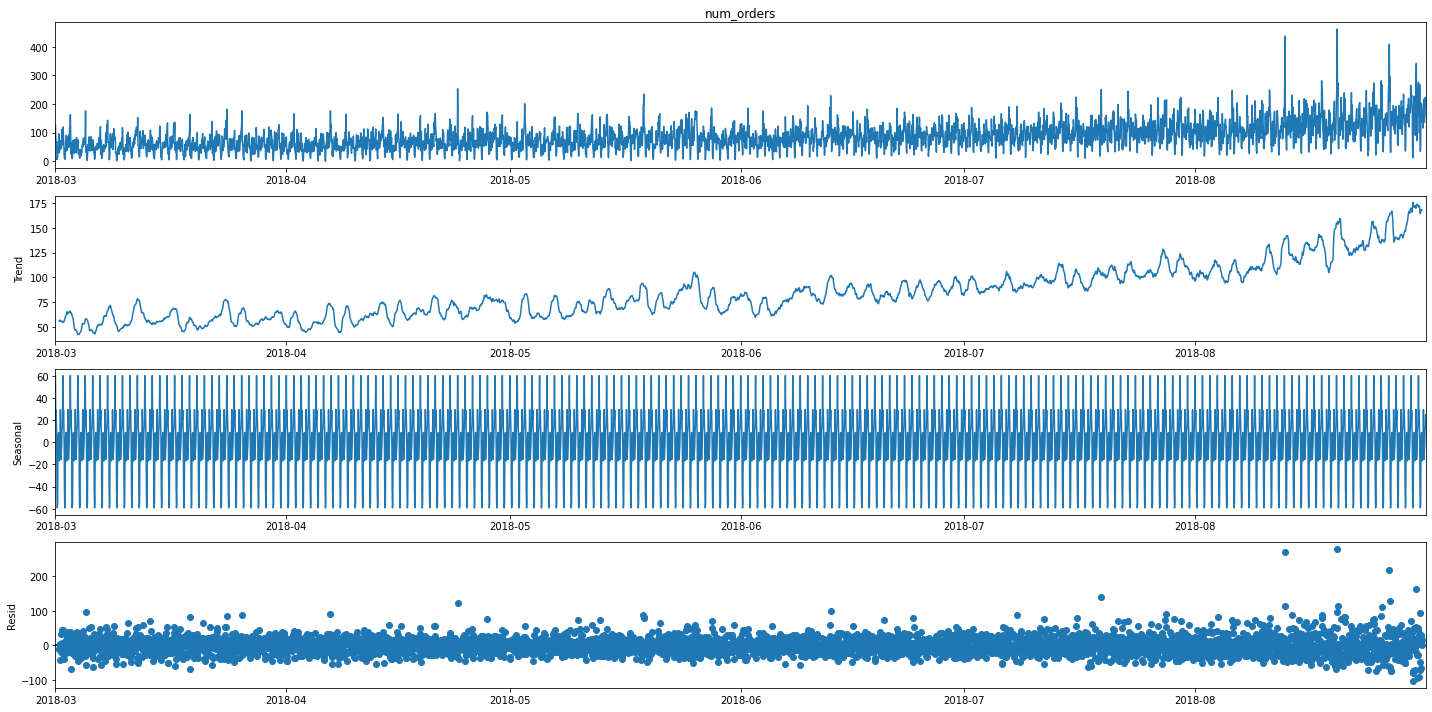

<Figure size 1600x480 with 0 Axes>

In [10]:

decompose = seasonal_decompose(data['num_orders'])
decompose.plot()
plt.figure(figsize=(20, 6), dpi=80)
plt.show()

In [11]:
# Проверим стационарность
adf_test = adfuller(data['num_orders'])
 
# выведем p-value
print('p-value = ' +str(adf_test[1]))
if float(str(adf_test[1]))<0.05:
    print("Ряд стационарный")
else:
    print("Ряд не стационарный")

p-value = 0.028940051402612906
Ряд стационарный


{'whiskers': [<matplotlib.lines.Line2D at 0x7f40c3eba550>,
 'caps': [<matplotlib.lines.Line2D at 0x7f40c3ebac10>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f40c3eba1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f40c3ec7310>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f40c3ec7670>],
 'means': []}

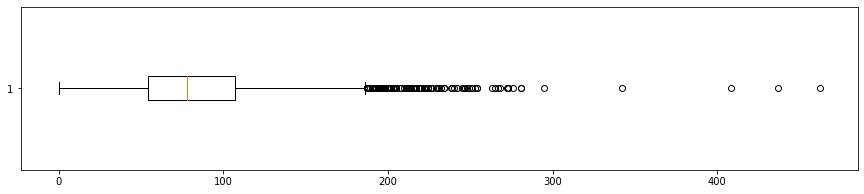

In [12]:
plt.figure(figsize=(15, 3))
plt.boxplot(x=data['num_orders'] ,vert=0)

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Можешь добавить анализ временного ряда на тренды и сезонность?) Эти составляющие можно исследовать методом декомпозиции.

Также стоит сопроводить исследовательский анализ промежуточными выводами.
</div>

<div class="alert alert-block alert-info">
    
<b>Комментарий студента:</b>  
> Добавлена декомпозиция ряда.  
> Добавлен проверка на стационарность ряда.  
> Выводы добавил ниже.    
</div>


<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [13]:
def make_features(data, max_lag, rolling_mean_size):
    
    data['hour'] = data.index.hour
    data['day'] = data.index.day
    data['dayofweek'] = data.index.dayofweek
    data['month'] = data.index.month
    
    for lag in range(1, max_lag + 1):
        data['lag_{}'.format(lag)] = data['num_orders'].shift(lag)

    data['rolling_mean'] = data['num_orders'].shift().rolling(rolling_mean_size).mean()
 

make_features(data, 24, 24)

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Вычисление скользящего среднего не должно включать в себя значение текущего ряда.

Чтобы не учитывать это, вызови метод shift():
</div>

```python
df['rolling_mean'] = df['num_orders'].shift().rolling(rolling_mean_size).mean()
```


<div class="alert alert-block alert-info">
    
<b>Комментарий студента:</b>  
Исправил 
</div>


<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Какие начальные значения можно подобрать для lag и скользящего среднего:

Lag. Его называют ещё параметром авторегрессии. На бытовом уровне его можно понять так: допустим вчера мы собрались с друзьями и немного закусили. Повлияет ли это на сегодняшний настрой на жизнь? Скорее да)))) Так вот с авторегрессией так же. Допустим, lag = 1 учитывает (для удобства будем считать, что продажи собраны по дням) как вчерашние продажи - вчерашние события - повлияли на сегодняшние. Тогда lag = 2 учитывает как позавчерашние продажи влияют на сегодняшние.
    
Скользящее среднее. Предположим, rolling = 10 - скользящее среднее. По сути, ищем среднее по 10 точкам, потом следующие 10 точек, и т.д. Это будет некое подобие тренда - средней линии. Т.е. - сглаживание колебаний/выбросов.
    
Поэтому, если выставить сезонности - час и день недели, то дополнительные факторы могут быть такие: lag = 1 (максимум 2), а скользящее среднее = 24 (среднее за сутки). Т.е. начинать с этого. В итоге модель будет приемлемая по точности и не много факторов. А это значит и для бизнеса будет легче доносить решение)

Советую для начала lag добавить за предыдущий час (1) и значением за вчерашний день (24), rolling_mean задать 24 (суточная сезонность)

</div>

<div class="alert alert-block alert-info">
    
<b>Комментарий студента:</b>  
Я попробовал применить Lag 1 и rolling_mean 24, но в этом случае расчет RSME по тестовой выборке улетает за 48. Что  в этом случае делать? как наиболее точно подобрать два этих  гиперпараметра? 
</div>


<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Для подбора этих параметров нужно смотреть на то, какие сезонности есть в данных. Если есть только дневная, то lag и rolling_mean можно выбрать по 24.

Также можешь в цикле подобрать оптимальные значения с помощью Линейной регрессии
</div>

<b>Выводы:</b>  
При анализе временного ряда мы визуально убедились в наличие двух вложенных сезонностей : кратность 24(дневная) и кратность 7 (недельная). Так же выяснили что ряд  являеться стационарным. (Хотя тренд  заметен? )

## Обучение

In [14]:
train,t_valid = train_test_split(data, shuffle=False, test_size=0.2)
valid,test = train_test_split(t_valid, shuffle=False, test_size=0.5)

train = train.dropna()
X_train=train.drop('num_orders', axis=1)
y_train=train['num_orders']
X_valid=valid.drop('num_orders', axis=1)
y_valid=valid['num_orders']
X_test=test.drop('num_orders', axis=1)
y_test=test['num_orders']



<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Можешь сделать размер тестовой выборки равной 10% от исходных данных? Будем придерживаться тз заказчика)
</div>

<div class="alert alert-block alert-info">
    
<b>Комментарий студента:</b>  
Сделал
</div>


<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [15]:
splits = TimeSeriesSplit(n_splits=7)
# RandomForest
RF = RandomForestRegressor(random_state=42)
parametrs = {"max_depth": [1,10,1],"n_estimators":[1,1000,50]}

RF_grid = GridSearchCV(RF,parametrs,cv = splits,scoring='neg_root_mean_squared_error',verbose=True,n_jobs=-1)
RF_grid.fit(X_train,y_train)

Fitting 7 folds for each of 9 candidates, totalling 63 fits


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=7, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 10, 1],
                         'n_estimators': [1, 1000, 50]},
             scoring='neg_root_mean_squared_error', verbose=True)

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

В GridSearchCV по-умолчанию используется R2  метрика. Проверить значение можно, вызвав `.best_score_`.  Тебе во всех GridSearchCV следует задать RMSE-метрику через параметр `scoring='neg_root_mean_squared_error'`. 
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

n_splits , обычно, задают так, чтобы размер валидационной выборки при проведении кросс-валидации примерно совпадал с размером тестовой выборки. Размер тестовой выборки у нас 10%, а размер валидационной равен 1/(n_splits+1) части от обучающей выборки (см. документацию к TimeSeriesSplit). К примеру, если n_splits=2, то размер валидационной равен 1/3 от обучающей выборки, т.е. 1/3*90%=30% от исходной выборки.
</div>

<div class="alert alert-block alert-info">
    
<b>Комментарий студента:</b>  
> Исравил метрику на RMSE.  
> Показатель n_splits поставил 7, что бы 1/8*90%=10%  соответсвовало тестовой выборке
    </div>


<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [16]:

preds_RF_valid = RF_grid.best_estimator_.predict(X_valid)
RMSE_RF=math.sqrt(mean_squared_error(y_valid, preds_RF_valid))
print('RMSE = {:.2f}'.format(RMSE_RF))
print (RF_grid.best_estimator_)

RMSE = 32.80
RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)


In [17]:
#LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)
pred_LR=LR.predict(X_valid)
RMSE_LR=math.sqrt(mean_squared_error(y_valid, pred_LR))

print('RMSE= {:.2f}'.format(RMSE_LR))


RMSE= 34.15


In [18]:

# LightGBM
lgb_train = lgb.Dataset(X_train,y_train)
lgb_valid = lgb.Dataset(X_valid,y_valid, reference=lgb_train)
parameters_light = {'metric': '12', 'max_depth':10,"random_state": 42,"learning_rate":0.1}
gbm= lgb.train(parameters_light,
                lgb_train,
                num_boost_round=1000,
                valid_sets=[lgb_train,lgb_valid],
                verbose_eval=100)



[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000800 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4548
[LightGBM] [Info] Number of data points in the train set: 3508, number of used features: 29
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 74.427024


/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [19]:
pred_gbm = gbm.predict(X_valid, num_iteration=gbm.best_iteration)
rmse_LGBM = mean_squared_error(y_valid, pred_gbm) ** 0.5
print(f' RMSE : {rmse_LGBM}')


 RMSE : 31.37828792812533


In [20]:
model = CatBoostRegressor(verbose=False)
model.fit(X_train, y_train)
pred_CBR = model.predict(X_valid)
RMSE_CBR =  mean_squared_error(y_valid, pred_CBR) ** 0.5
print(f' RMSE : {RMSE_CBR}')

 RMSE : 30.998053426495993


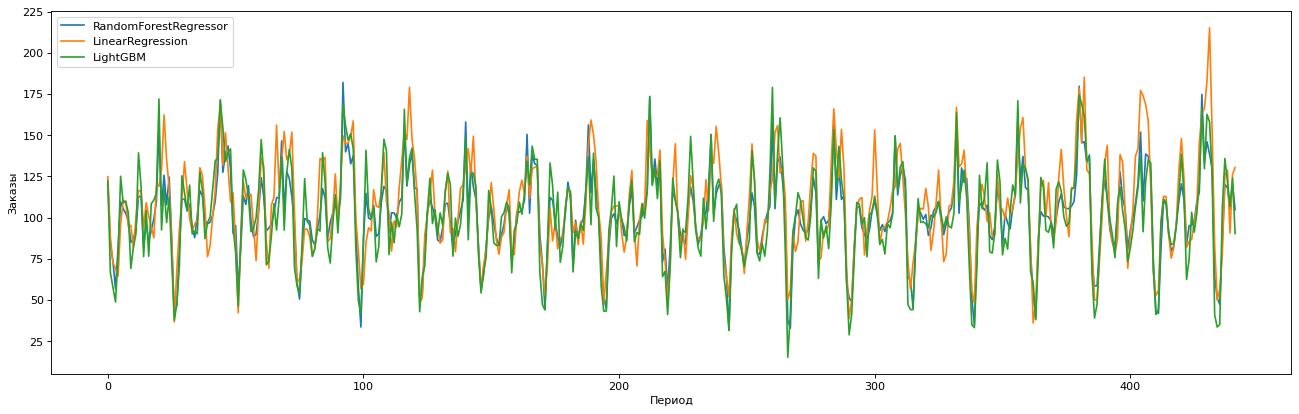

In [21]:
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(preds_RF_valid, label='RandomForestRegressor')
plt.plot(pred_LR, label='LinearRegression')
plt.plot(pred_gbm, label='LightGBM', )

plt.legend()
plt.ylabel('Заказы')
plt.xlabel('Период')
plt.show()

In [22]:
rezult = pd.DataFrame({ 'Параметры': ['RMSE'],
                       'RF':[RMSE_RF], 'LR':[RMSE_LR],'LGBM': [rmse_LGBM],'CBR': [RMSE_CBR]})
rezult.head()

,Параметры,RF,LR,LGBM,CBR
0,RMSE,32.799979,34.154522,31.378288,30.998053


## Тестирование

In [23]:

pred= gbm.predict(X_test, num_iteration=gbm.best_iteration)
RMSE=math.sqrt(mean_squared_error(y_test, pred))

print('RMSE= {:.2f}'.format(RMSE))


RMSE= 49.30


In [24]:
X_combine = pd.concat([X_train, X_valid], axis=0, ignore_index=True)
y_combine = pd.concat([y_train, y_valid], axis=0, ignore_index=True)
model = CatBoostRegressor(verbose=False)
model.fit(X_combine, y_combine)
pred_CBR = model.predict(X_test)
RMSE_CBR =  mean_squared_error(y_test, pred_CBR) ** 0.5
print(f' RMSE : {RMSE_CBR}')

 RMSE : 39.83498615862576


<div class="alert alert-block alert-info">
<b>Комментарий студента:</b>  Не могу понять почему так проседает RMSE??
</div>

<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

1. Попробуй увеличить lag до 24
2. Для fit можешь объединить тренировочную и валидационную выборки
</div>

<div class="alert alert-block alert-info">
<b>V2 Комментарий студента:</b>  Добился результа, только переобучив модель CatBoostRegressor на комбинированной выборки train+valid.  
Такой подход допустим??
</div>

<div class="alert alert-block alert-success">
<b>V3 ✔️ Успешно исправлено</b>

Да, при тестировании можно объединить выборки)
</div>

<b>Выводы:</b> 
В проекте первичный датасет был  развернут во временной ряд и насыщен дополнительными признаками.  
В процессе обучения были построены три модели : RandomForestRegressor,LinearRegression,LightGBM,CatBoostRegressor 
Выбрана наиболее подходящая модель (критерий RMSE)   


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отличный результат 👍 
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Рекомендую построить график с реальным и предсказанным значением тестовой выборки. Так мы сможем визуально оценить, насколько хорошо или плохо работают модели. Это один из важнейших инструментов анализа результатов моделирования временных рядов. Лучше выбрать масштаб, скажем, несколько дней, чтобы можно было увидеть и сравнить каждый час.
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Не забывай про финальный вывод)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>Рекомендации 🔥</font>
* Анализ временных рядов на python https://habr.com/ru/company/ods/blog/327242/
* Полезная лекция про временные ряды: https://www.youtube.com/watch?v=u433nrxdf5k
* Проверить ряд на стационарность можно с помощью теста Дики-Фуллера http://distrland.blogspot.com/2020/06/python_28.html
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результаты обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"